In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/content/Customer-churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
# checking for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
# dropping id column (no useful feature)
df = df.drop('customerID',axis=1)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


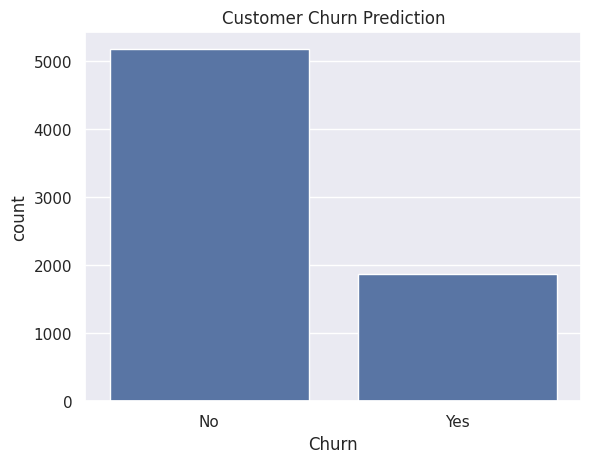

In [8]:
# churn distribution
sns.set()
sns.countplot(data=df,x='Churn')
plt.title('Customer Churn Prediction')
plt.show()

In [9]:
# percentage of churners
churn_rate = df['Churn'].value_counts(normalize=True)*100
print(churn_rate)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


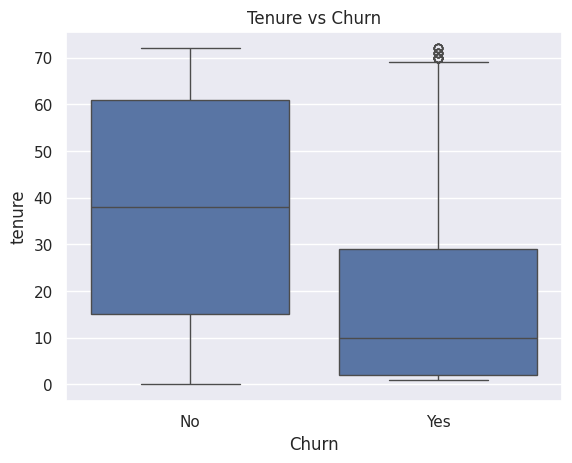

In [10]:
# tenure vs churn
sns.boxplot(data=df,x='Churn',y='tenure')
plt.title('Tenure vs Churn')
plt.show()

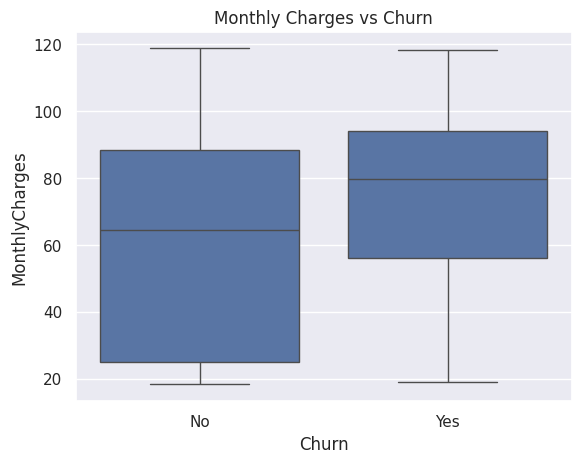

In [11]:
# monthly charges vs churn
sns.boxplot(data=df,x='Churn',y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')


In [13]:
# label encoding
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [28]:
import json
model_columns = list(x.columns)
with open('model_columns.json', 'w') as f:
    json.dump(model_columns, f)

In [14]:
# train-test-split
x = df.drop('Churn',axis=1)
y = df.Churn

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=3)

In [15]:
# standardizing data
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [16]:
# random-forest hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf' : [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(random_state=3),
#                     param_grid, cv=5, scoring='f1', n_jobs=-1)
# grid.fit(x_train_std, y_train)
# print("Best Parameters:", grid.best_params_)
# print("Best Score:", grid.best_score_)

In [17]:
# xgboost hyperparameter tuning
# param_grid2 = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1],
#     'colsample_bytree': [0.8, 1]
# }

# xgb_grid = GridSearchCV(XGBClassifier(eval_metric='logloss'),
#                         param_grid2, cv=5, scoring='f1', n_jobs=-1)
# xgb_grid.fit(x_train_std, y_train)

# print("Best XGB Params:", xgb_grid.best_params_)
# print("Best XGB Score:", xgb_grid.best_score_)

In [18]:
models = {
    'Logistic Regression' : LogisticRegression(max_iter=1000),
    'Random Forest' : RandomForestClassifier(n_estimators=300,random_state=3),
    'XGBoost' : XGBClassifier(eval_metric='logloss',random_state=3),
    'SVC' : SVC(kernel='linear')
}

In [19]:
for name,model in models.items():
    model.fit(x_train_std,y_train)
    pred = model.predict(x_test_std)
    acc = accuracy_score(y_test,pred)
    print(f'\n{name} Accuracy : {acc:.4f}')
    print(classification_report(y_test,pred))


Logistic Regression Accuracy : 0.7999
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Random Forest Accuracy : 0.7857
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.46      0.53       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409


XGBoost Accuracy : 0.7850
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      

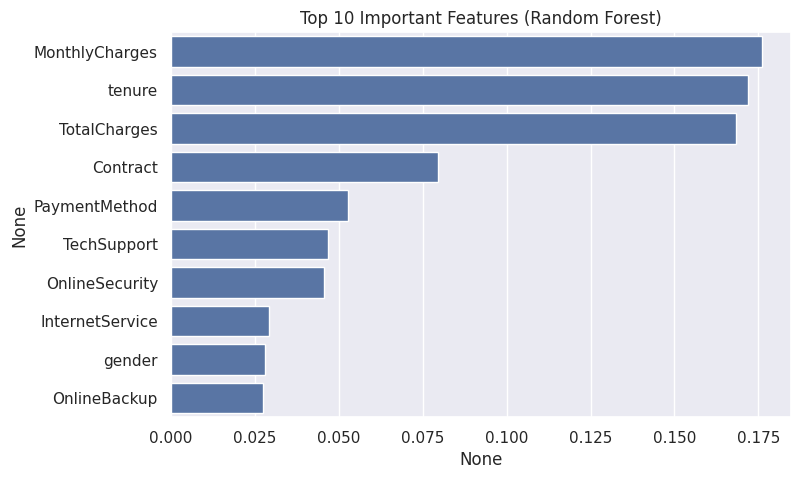

In [20]:
# checking most important features
rf = models['Random Forest']

importances = pd.Series(rf.feature_importances_, index=x.columns)
importances = importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index,)
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

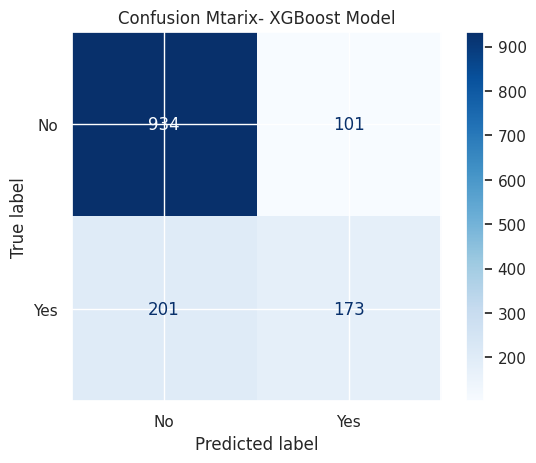

In [26]:
# confusion matrix

model = RandomForestClassifier(n_estimators=300,random_state=3)
model.fit(x_train_std,y_train)
y_pred = model.predict(x_test_std)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes']).plot(cmap='Blues')
plt.title('Confusion Mtarix- XGBoost Model')
plt.show()

In [27]:
import pickle
filename='churn_model.pkl'
pickle.dump(model,open(filename,'wb'))
sc = 'scaler.pkl'
pickle.dump(scaler,open(sc,'wb'))